## Generated figures:
* 7B (model integrator variance)
* 7C, 7D (model place cell heatmaps)
* 7E (model place cell density)
* 7F (model place cell reliability)
* 7G (model place cell reliability over all 4 days)
* 7H (model PC density over all 4 days)

This notebook generates all figures related to the model.

In [66]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.ndimage import gaussian_filter1d
from matplotlib import colors

In [67]:
data = np.load("pc_data.npz")
pc_matrix, all_rates, all_ints = data["pc_matrix"], data["all_rates"], data["all_ints"]
X = all_rates
num_pcs = pc_matrix.sum(axis=1)

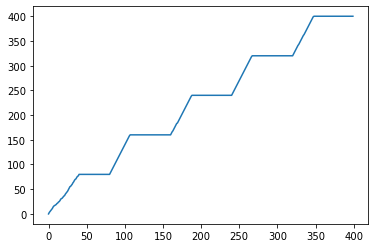

[(50, 80), (130, 160), (210, 240), (290, 320), (370, 400)]
(5, 30, 200, 400)


In [45]:
plt.plot(num_pcs)
plt.show()

trials_per_day = 80
num_days = 5

X_days = np.array([all_rates[80*i+50:80*i+80] for i in range(num_days)])
X_days = gaussian_filter1d(X_days, axis=2, sigma=2.5)

ranges = [(80*i+50, 80*i+80) for i in range(num_days)]
print(ranges)
print(X_days.shape)

def prettyify_ax(ax):
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.set_xlim([-0.05, 4.05])
    
colors_04 = ["black", "#CB2027"]
colors_1_thru_4 = ["#FABAA0", "#F26B4D", "#CB2027", "#650712"]

(80,)
(400,)


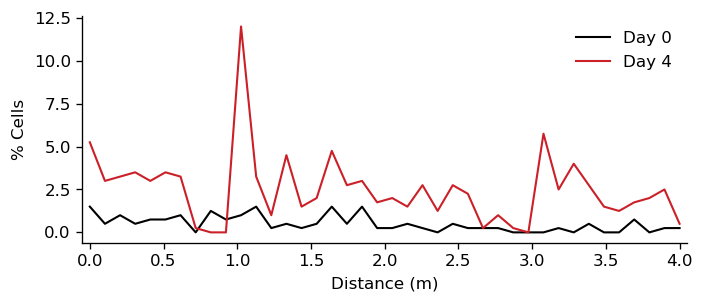

(160,)
(240,)
(320,)
(400,)


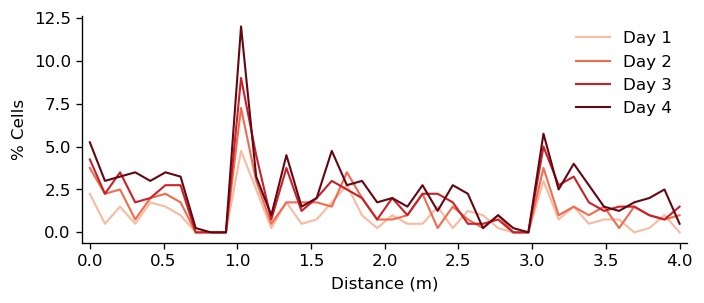

In [46]:
def plot_density_days(days, colors):
    fig, ax = plt.subplots(1, 1, figsize=(6.5, 2.5), dpi=120)
    i = 0
    for day_idx in days:
        X = X_days[day_idx]
        X_avg = X.mean(axis=0)
        pc_idx = X_avg.sum(axis=0) > 1e-12
        centers = X_avg[:, pc_idx].argmax(axis=0) * 4. / 200
        print(centers.shape)
        density = np.array([np.sum((centers >= i*.1) & (centers < (i+1)*.1)) for i in range(40)])/400.
        xvals = np.linspace(0, 4., 40)
        ax.plot(xvals, 100*density, lw=1.25, c=colors[i], label="Day " + str(day_idx))
        i += 1
    prettyify_ax(ax)
    ax.set_xlabel("Distance (m)")
    ax.set_ylabel("% Cells")
    ax.legend(frameon=False)
    
plot_density_days((0, 4), colors_04)
#plt.savefig("updated_figs/density_04.svg", bbox_inches="tight")
plt.show()

plot_density_days((1, 2, 3, 4), colors_1_thru_4)
#plt.savefig("updated_figs/density_1_thru_4.svg", bbox_inches="tight")
plt.show()

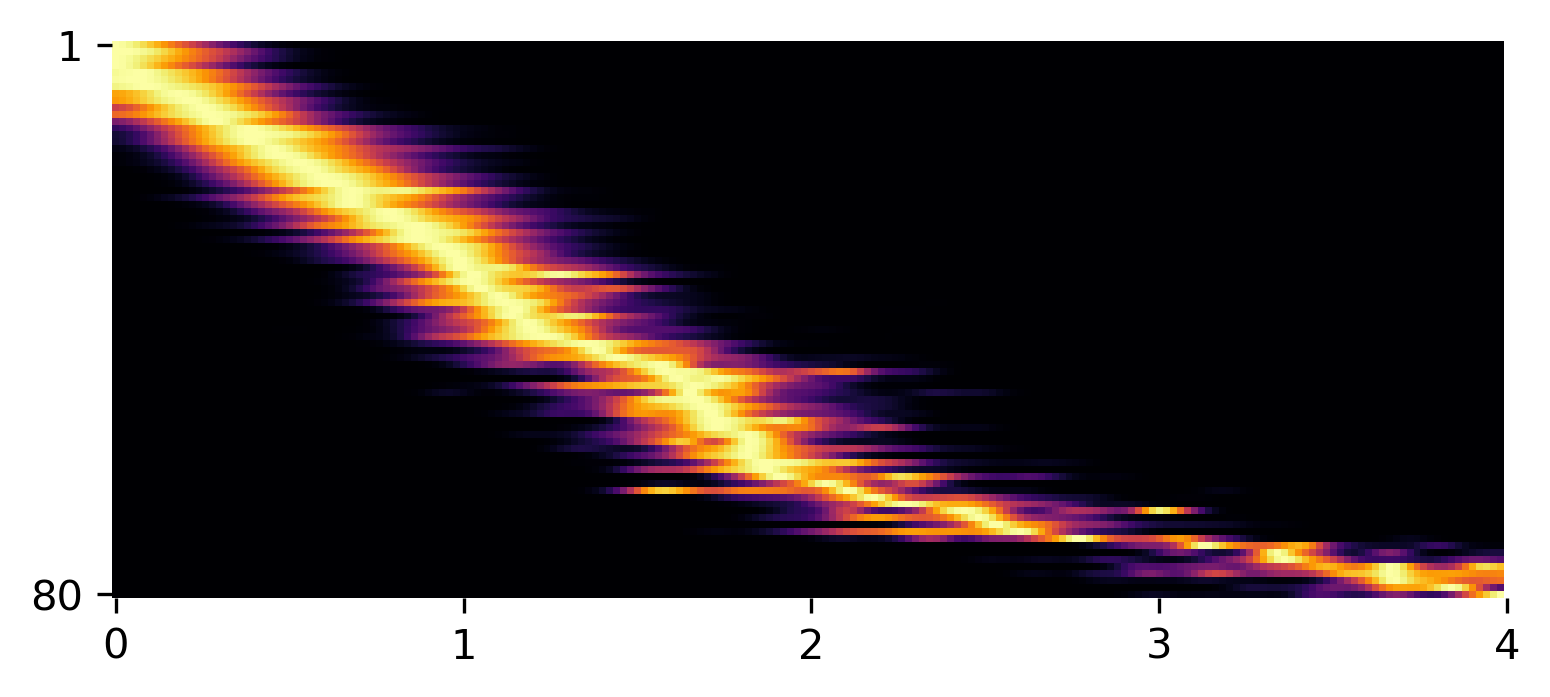

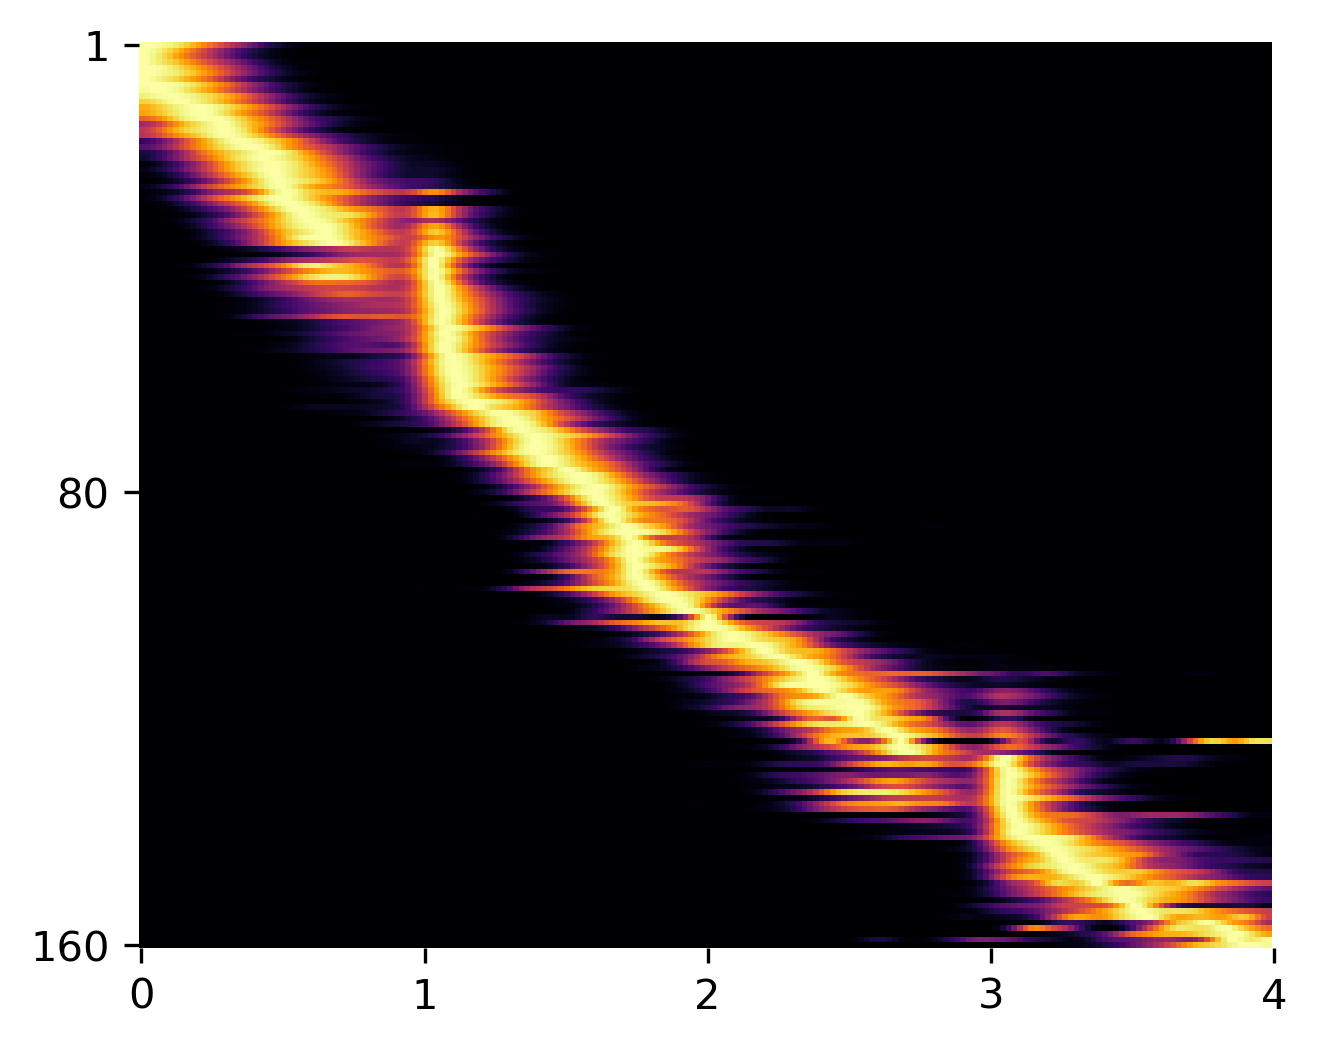

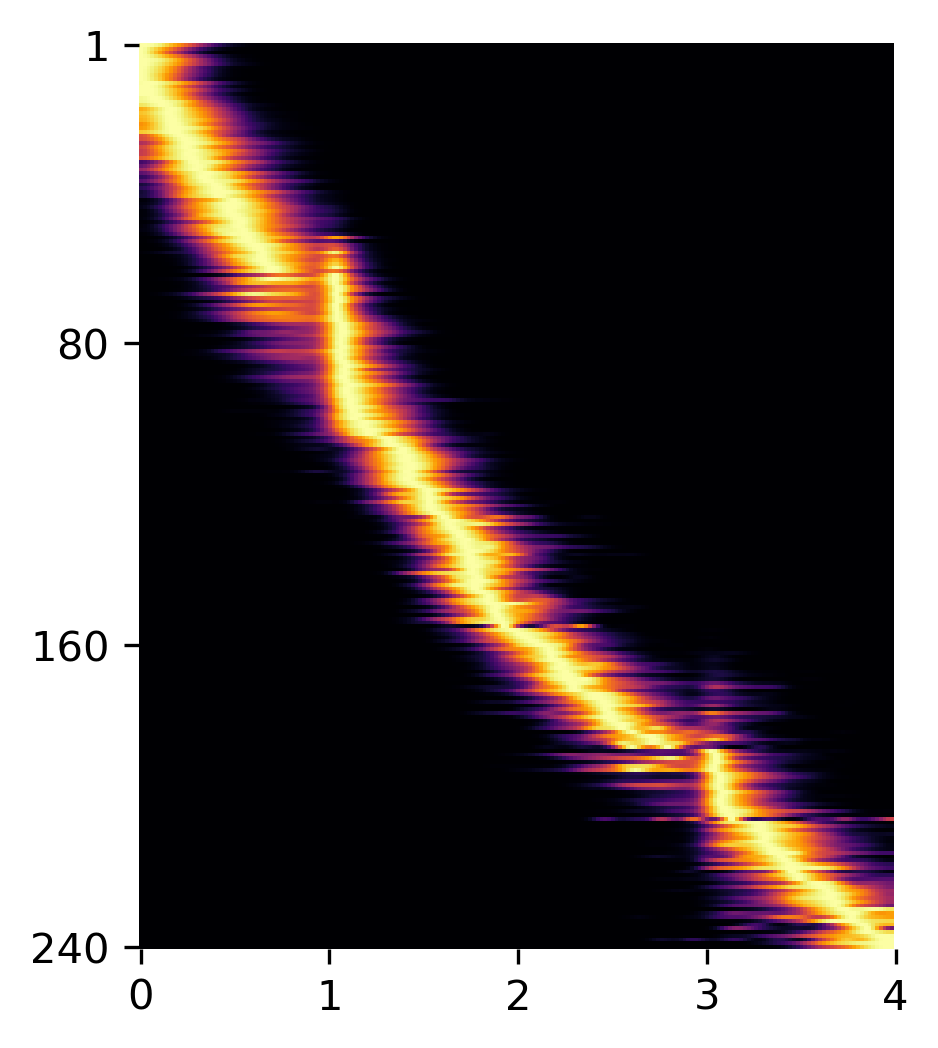

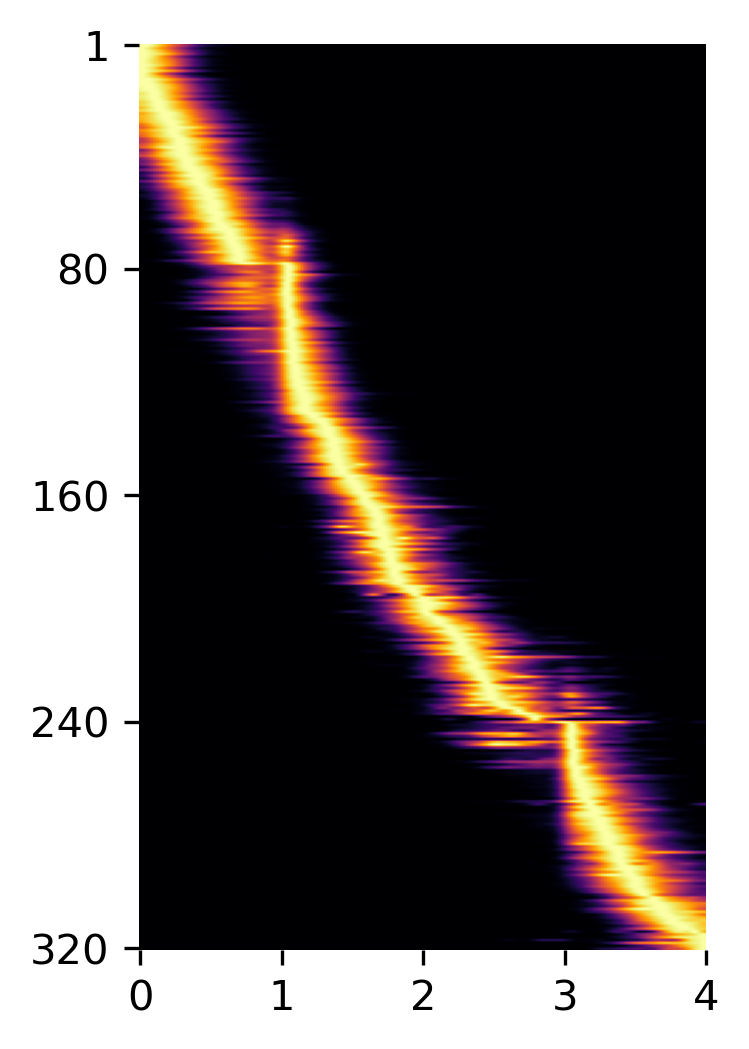

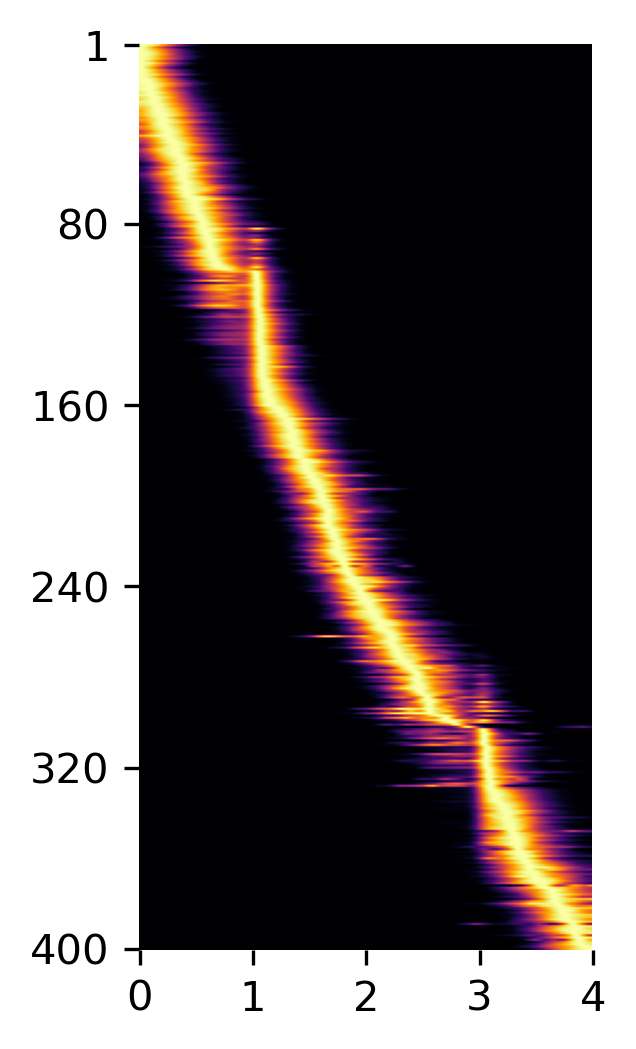

In [47]:
for day_idx in range(0, 5):
    X = X_days[day_idx]
    X_avg = X.mean(axis=0)
    pc_idx = X_avg.sum(axis=0) > 1e-12
    X_pc_avg = X_avg[:, pc_idx]
    centers = X_avg[:, pc_idx].argmax(axis=0) * 4. / 200
    order = np.argsort(centers)
    X_pc_avg /= X_pc_avg.max(axis=0, keepdims=True)
    fig, ax = plt.subplots(1, 1, dpi=300)
    ax.imshow(X_pc_avg[:, order].T, cmap="inferno")
    yticks = np.array([0] + [i*80-1 for i in range(1, day_idx+2)])
    ax.set_yticks(yticks)
    ax.set_yticklabels(yticks + 1)
    ax.set_xticks([0, 50, 100, 150, 200])
    ax.set_xticklabels([0, 1, 2, 3, 4])
    #ax.set_yticks([])
    ax.spines["left"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    #plt.savefig("updated_figs/heatmap_day_"+str(day_idx)+".svg", bbox_inches="tight")#, pad_inches=0)
    plt.show()
    

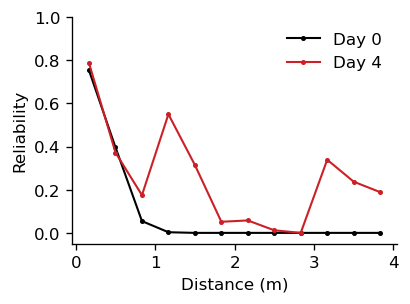

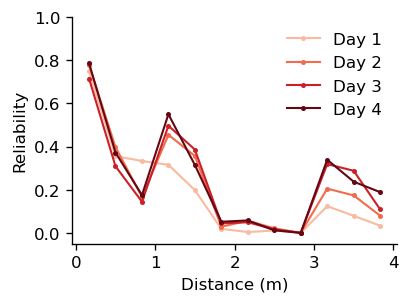

In [48]:
def plot_reliability(X, ax, **kwargs):
    good_idx = np.sum(X**2, axis=(0, 1)) > 0
    X = X[:, :, good_idx]
    num_cells = X.shape[2]
    centers = X.mean(axis=0).argmax(axis=0)
    centers_m = centers*4./X.shape[1]
    rel = (X[:, centers, np.arange(num_cells)] > .15).mean(axis=0)
    num_bins = 12
    bin_size = 4. / num_bins
    bin_centers = np.arange(num_bins)*bin_size + bin_size/2
    binned_rel = np.array([np.mean(rel[(centers_m >= bin_size*i) & (centers_m < bin_size*(i+1))])
                           for i in range(num_bins)])
    ax.plot(bin_centers, binned_rel, **kwargs)

def plot_reliability_days(days, colors):    
    fig, ax = plt.subplots(1, 1, figsize=(3.5, 2.5), dpi=120)
    i = 0
    for day_idx in days:
        plot_reliability(X_days[day_idx], ax, lw=1.25, marker=".", ms=4, c=colors[i], label="Day " + str(day_idx))
        i += 1
    prettyify_ax(ax)
    ax.set_ylim([-0.05, 1])
    ax.set_xlabel("Distance (m)")
    ax.set_ylabel("Reliability")
    ax.legend(frameon=False)

plot_reliability_days((0, 4), colors_04)
#plt.savefig("updated_figs/reliability_04.svg", bbox_inches="tight")
plt.show()

plot_reliability_days(range(1, 5), colors_1_thru_4)
#plt.savefig("updated_figs/reliability_1_thru_4.svg", bbox_inches="tight")
plt.show()

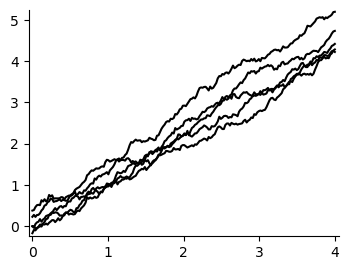

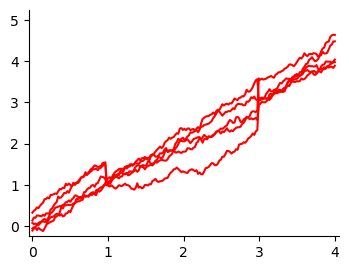

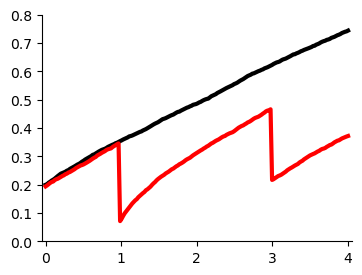

In [49]:
x = np.linspace(0, 4., all_ints.shape[1])
fig, ax = plt.subplots(1, 1, figsize=(4, 3), dpi=100)
ax.plot(x, all_ints[75, :, :5], c="black")
prettyify_ax(ax)
ax.set_ylim([-.25, 5.25])
#plt.savefig("updated_figs/ints_4m_pre.svg", bbox_inches="tight")
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(4, 3), dpi=100)
ax.plot(x, all_ints[385, :, :5], c="red")
prettyify_ax(ax)
ax.set_ylim([-.25, 5.25])
#plt.savefig("updated_figs/ints_4m_post.svg", bbox_inches="tight")
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(4, 3), dpi=100)
ax.plot(x, all_ints[50:80].std(axis=0).mean(axis=1), c="black", lw=3)
ax.plot(x, all_ints[370:400].std(axis=0).mean(axis=1), c="red", lw=3)
prettyify_ax(ax)
ax.set_ylim([0, .8])
#plt.savefig("updated_figs/ints_std.svg", bbox_inches="tight")
plt.show()